# Exploring the derivatives

In [1]:
library(tidyverse)

options(repr.plot.width=12)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
load(file.path('../data', 'ecdc.rda'))

tbl_ecdc_threshold %>% 
    head()

date_rep,cases,deaths,country,geoId,country_code,population,cumulative_reported,cumulative_deaths,days_since
<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-03-29,15,1,Afghanistan,AF,AFG,37172386,106,3,0
2020-03-30,8,1,Afghanistan,AF,AFG,37172386,114,4,1
2020-03-31,27,0,Afghanistan,AF,AFG,37172386,141,4,2
2020-04-01,25,0,Afghanistan,AF,AFG,37172386,166,4,3
2020-04-02,26,0,Afghanistan,AF,AFG,37172386,192,4,4
2020-04-03,43,0,Afghanistan,AF,AFG,37172386,235,4,5


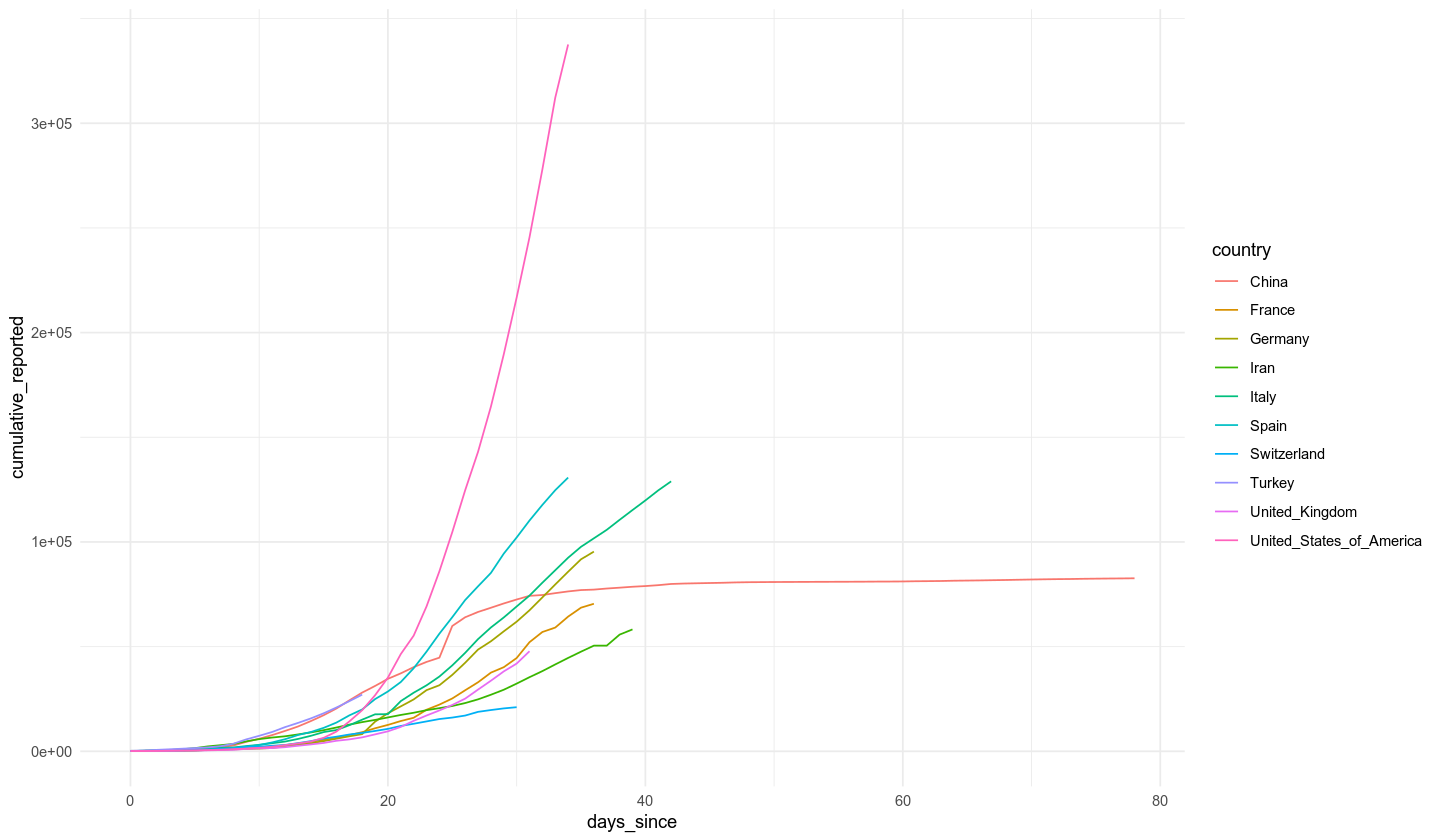

In [3]:
tbl_top_countries <- tbl_ecdc %>% 
  group_by(country) %>% 
  summarise(max_cumul = max(cumulative_reported)) %>% 
  ungroup() %>% 
  arrange(desc(max_cumul)) %>% 
  head(10) %>%
  inner_join(tbl_ecdc_threshold, by = 'country')

tbl_top_countries %>% 
  ggplot(aes(days_since, cumulative_reported, color = country)) + 
  geom_line() + 
  theme_minimal()


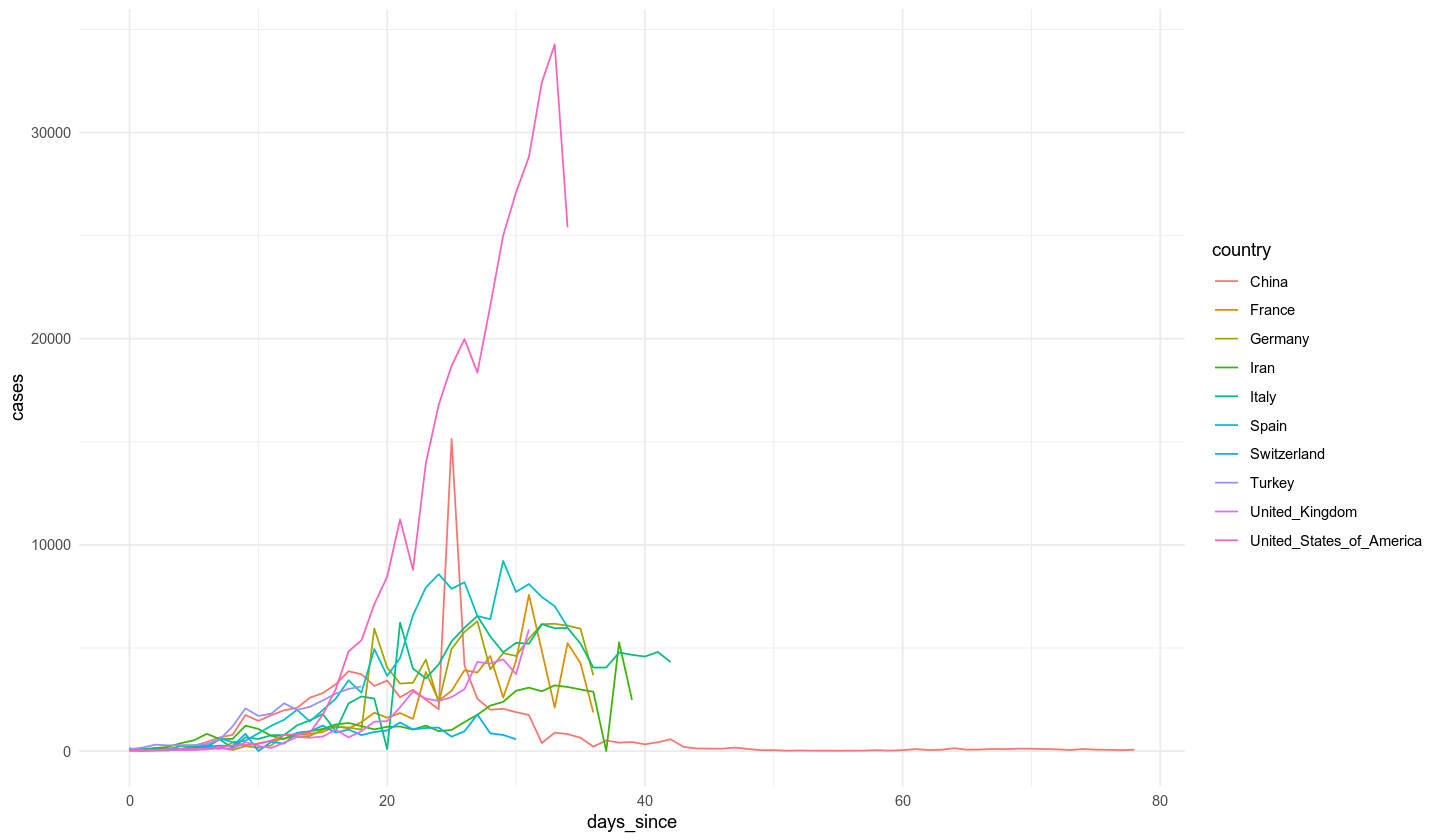

In [4]:
tbl_top_countries %>% 
  ggplot(aes(days_since, cases, color = country)) + 
  geom_line() + 
  theme_minimal()


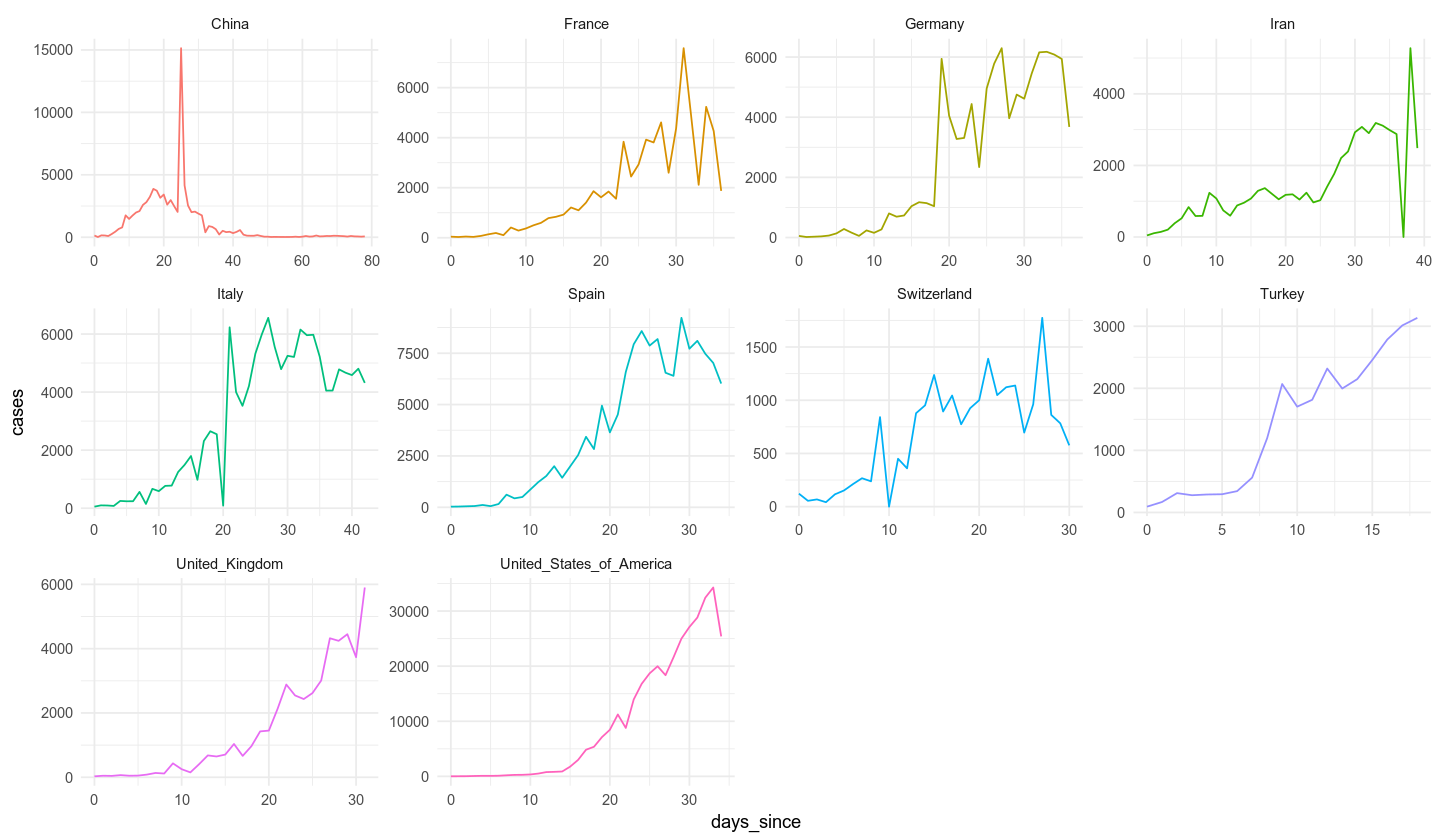

In [5]:
tbl_top_countries %>% 
  ggplot(aes(days_since, cases, color = country)) + 
  geom_line(show.legend = FALSE) + 
  theme_minimal() + 
  facet_wrap(~ country, scales = 'free')

In the plot above, we see that newly reported cases have peaked for most of the top ten countries. There are obviously any number of qualifiers for this, not least of which is the availability of testing and quality of official figures.

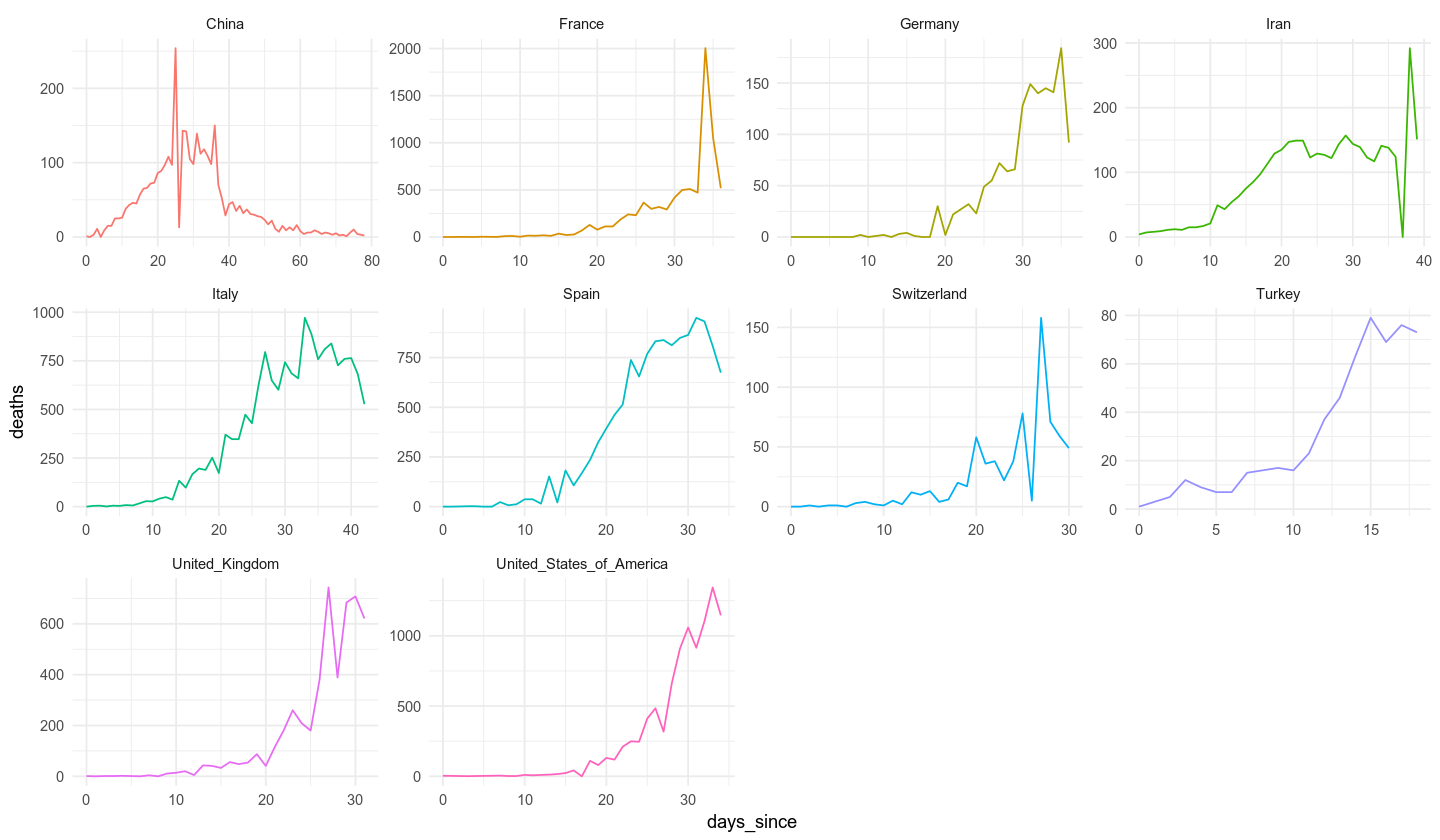

In [6]:
tbl_top_countries %>% 
  ggplot(aes(days_since, deaths, color = country)) + 
  geom_line(show.legend = FALSE) + 
  theme_minimal() + 
  facet_wrap(~ country, scales = 'free')